Load All Records

In [5]:
import wfdb
import pandas as pd

record_ids = [
    '100', '101', '102', '103', '104', '105', '106', '107',
    '108', '109'  # Add more if available
]

all_records = []

for record_id in record_ids:
    try:
        record = wfdb.rdrecord(f"../Data/{record_id}")
        annotation = wfdb.rdann(f"../Data/{record_id}", 'atr')
        all_records.append({
            "record_id": record_id,
            "fs": record.fs,
            "n_samples": record.sig_len,
            "n_channels": record.n_sig,
            "annotations": annotation.sample
        })
        print(f"Loaded {record_id}")
    except Exception as e:
        print(f"Error loading {record_id}: {e}")

# Create summary DataFrame
summary = []

for rec in all_records:
    summary.append({
        "ID": rec["record_id"],
        "Sampling Rate (Hz)": rec["fs"],
        "Total Samples": rec["n_samples"],
        "Channels": rec["n_channels"],
        "Beats Detected": len(rec["annotations"])
    })
# Extracted metadata is stored as a DataFrame for better visualization
df_summary = pd.DataFrame(summary)
print(df_summary)


Loaded 100
Loaded 101
Loaded 102
Loaded 103
Loaded 104
Loaded 105
Loaded 106
Loaded 107
Loaded 108
Loaded 109
    ID  Sampling Rate (Hz)  Total Samples  Channels  Beats Detected
0  100                 360         650000         2            2274
1  101                 360         650000         2            1874
2  102                 360         650000         2            2192
3  103                 360         650000         2            2091
4  104                 360         650000         2            2311
5  105                 360         650000         2            2691
6  106                 360         650000         2            2098
7  107                 360         650000         2            2140
8  108                 360         650000         2            1824
9  109                 360         650000         2            2535


Visualize ECG Sample

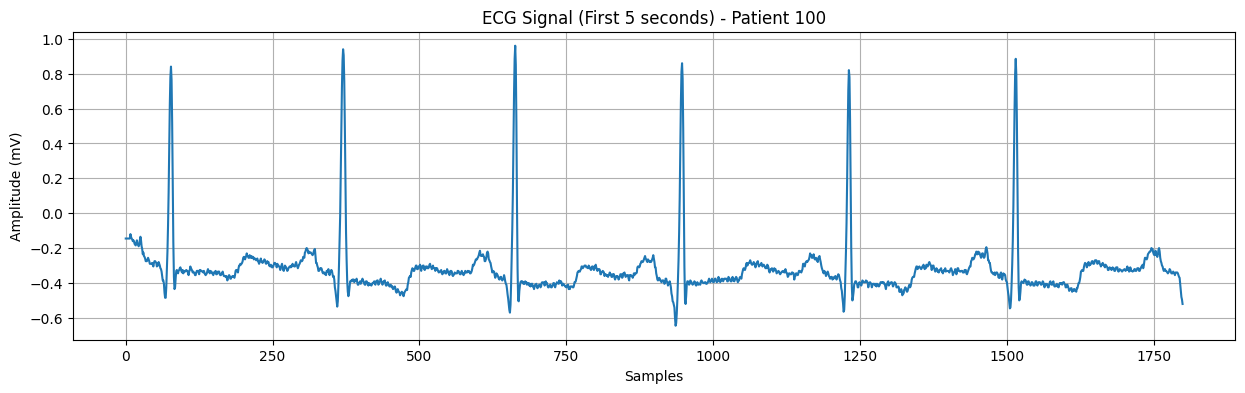

In [13]:
import matplotlib.pyplot as plt
import wfdb

# Load full signal for patient 100 again (or store in all_records next time)
record = wfdb.rdrecord("../Data/100")
signal = record.p_signal  # Full ECG signal as a NumPy array
fs = record.fs

# Plot first 5 seconds (fs * 5 samples)
plt.figure(figsize=(15, 4))
plt.plot(signal[:fs*5, 0])  # Lead 0 (e.g., MLII)
plt.title("ECG Signal (First 5 seconds) - Patient 100")
plt.xlabel("Samples")
plt.ylabel("Amplitude (mV)")
plt.grid(True)
plt.show()
